<a href="https://colab.research.google.com/github/RicmwasData/SeniorDataAnalyst-InterviewJourney-PalladiumKE/blob/master/Palladium_data_analysis_eric_mwangi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load libraries

In [ ]:
#load libraries
install.packages(c("psych", "parameters",
"kableExtra","IRdisplay",
"rstatix","survival",
"gtsummary","vtable",
'keras','tensorflow',
"caret","tidymodels"))
remotes::install_github("UrbanInstitute/urbnthemes", build_vignettes = TRUE)
library(tidyverse)
library(psych)
library(lubridate)
library(readxl)
library(parameters)
library(urbnthemes)
library(rstatix)
library(survival)
library(gtsummary)
library(vtable) # summary table
#display
library(knitr)
library(kableExtra)
library(IRdisplay)
set_urbn_defaults(style = "print")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘listenv’, ‘parallelly’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘V8’, ‘reactR’, ‘prodlim’, ‘future’, ‘warp’, ‘lhs’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘labelled’, ‘bigD’, ‘bitops’, ‘htmlwidgets’, ‘juicyjuice’, ‘markdown’, ‘reactable’, ‘Rcpp’, ‘RcppTOML’, ‘here’, ‘png’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘ipred’, ‘timeDate’, ‘DiceDesign’, ‘patchwork’, ‘globals’, ‘furrr’, ‘slider’, ‘GPfit’, ‘modelenv’, ‘mnormt’, ‘bayestestR’, ‘datawizard’, ‘insight’, ‘webshot’, ‘corrplot’, ‘car’, ‘broom.helpers’, ‘gt’, ‘sjlabelled’, ‘reticulate’, ‘tfruns’, ‘zeallot’, ‘config’, ‘tfautograph’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘dials’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘rsample’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yard

cli         (3.6.1 -> 3.6.2 ) [CRAN]
vctrs       (0.6.4 -> 0.6.5 ) [CRAN]
fansi       (1.0.5 -> 1.0.6 ) [CRAN]
scales      (1.2.1 -> 1.3.0 ) [CRAN]
isoband     (0.2.6 -> 0.2.7 ) [CRAN]
cpp11       (0.4.6 -> 0.4.7 ) [CRAN]
stringi     (1.8.2 -> 1.8.3 ) [CRAN]
Rttf2pt1    (NA    -> 1.3.12) [CRAN]
extrafontdb (NA    -> 1.0   ) [CRAN]
gridExtra   (NA    -> 2.3   ) [CRAN]
ggrepel     (NA    -> 0.9.4 ) [CRAN]
extrafont   (NA    -> 0.19  ) [CRAN]


Installing 12 packages: cli, vctrs, fansi, scales, isoband, cpp11, stringi, Rttf2pt1, extrafontdb, gridExtra, ggrepel, extrafont

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpcwYywn/remotes11d4379093e/UrbanInstitute-urbnthemes-f6a368d/DESCRIPTION’ ... OK
* preparing ‘urbnthemes’:
* checking DESCRIPTION meta-information ...Warning in person1(given = given[[i]], family = family[[i]], middle = middle[[i]],  :
  It is recommended to use ‘given’ instead of ‘middle’.
 OK
Warning in person1(given = given[[i]], family = family[[i]], middle = middle[[i]],  :
  It is recommended to use ‘given’ instead of ‘middle’.
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘urbnthemes_0.0.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Setting Mac/Linux options...


Attaching package: ‘urbnthemes’


The following objects are masked from ‘package:ggplot2’:

    geom_bar, geom_col, scale_color_discrete, scale_color_gradientn,
    scale_color_ordinal, scale_colour_discrete, scale_colour_gradientn,
    scale_colour_ordinal

# Load data

In [ ]:
#Import data
covid_mexico_data <- read_excel("/content/covid_mexico_data.xlsx")

# Data exploration and cleaning

## Data structure

In [ ]:

glimpse(covid_mexico_data)

Rows: 10,000
Columns: 23
$ id                  <chr> "0dd249", "0957d9", "0ad2eb", "1646ba", "1e31dd", …
$ sex                 <chr> "Male", "Female", "Female", "Female", "Male", "Mal…
$ patient_type        <chr> "Outpatient", "Outpatient", "Outpatient", "Outpati…
$ entry_date          <chr> "24-05-2020", "18-06-2020", "11-05-2020", "24-06-2…
$ date_symptoms       <chr> "18-05-2020", "16-06-2020", "11-05-2020", "19-06-2…
$ date_died           <chr> NA, NA, NA, NA, NA, NA, NA, NA, "15-04-2020", NA, …
$ intubed             <chr> NA, NA, NA, NA, NA, NA, NA, NA, "Yes", NA, "No", N…
$ pneumonia           <chr> "Yes", "No", "No", "No", "No", "No", "No", "No", "…
$ age                 <dbl> 29, 45, 25, 11, 28, 9, 28, 58, 76, 30, 47, 34, 46,…
$ pregnancy           <chr> NA, "No", "No", "No", NA, NA, "No", NA, NA, "No", …
$ diabetes            <chr> "No", "No", "No", "No", "No", "No", "No", "No", "N…
$ copd                <chr> "No", "No", "No", "No", "No", "No", "No", "No", "N…
$ asthma       

## Data summary

In [ ]:
#summary statistics
covid_mexico_data%>%
  select_if(is.numeric)%>%
st( out= "kable", title = "Summary Statistics for Numeric Variable")%>%
  as.character()%>%
  display_html()

Variable,N,Mean,Std. Dev.,Min,Pctl. 25,Pctl. 75,Max
age,10000,43,20,-67,31,53,856


In [ ]:
#summary statistics
covid_mexico_data%>%
  select_if(is.character)%>%
st( out= "kable")%>%
  as.character()%>%
  display_html()

Variable,N,Percent
sex,10000,
... Female,4764,48%
... Femalee,111,1%
... Male,5073,51%
... Males,52,1%
patient_type,10000,
... Inpatient,2140,21%
... Outpatient,7860,79%
intubed,2137,
... No,1956,92%


## Change Dates from character data dtype to Date format

In [ ]:
#convert dates column to date format
covid_mexico_data<- covid_mexico_data%>%
  mutate(entry_date= dmy(entry_date),
         date_symptoms= dmy(date_symptoms),
         date_died= dmy(date_died))

## Check for missing values

In [ ]:
# Check missing values
lapply(covid_mexico_data, function(x) sum(is.na(x))) %>% str()

List of 23
 $ id                 : int 0
 $ sex                : int 0
 $ patient_type       : int 0
 $ entry_date         : int 0
 $ date_symptoms      : int 0
 $ date_died          : int 9361
 $ intubed            : int 7863
 $ pneumonia          : int 1
 $ age                : int 0
 $ pregnancy          : int 5159
 $ diabetes           : int 35
 $ copd               : int 31
 $ asthma             : int 32
 $ inmsupr            : int 34
 $ hypertension       : int 32
 $ other_disease      : int 44
 $ cardiovascular     : int 34
 $ obesity            : int 31
 $ renal_chronic      : int 33
 $ tobacco            : int 34
 $ contact_other_covid: int 3107
 $ covid_res          : int 0
 $ icu                : int 7863


## Check deplicates

In [ ]:
#Check duplicates
nrow(covid_mexico_data)- length(unique(covid_mexico_data$id))
covid_mexico_data%>%
  filter(id %in%  covid_mexico_data$id[duplicated(covid_mexico_data$id)])

[1] 6

id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,⋯,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
<chr>,<chr>,<chr>,<date>,<date>,<date>,<chr>,<chr>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0.00E+00,Female,Outpatient,2020-06-09,2020-06-05,NA,NA,No,34,No,⋯,No,No,No,No,No,No,No,NA,Positive,NA
0.00E+00,Male,Inpatient,2020-06-25,2020-06-22,NA,No,No,48,NA,⋯,No,No,No,No,No,No,No,No,Negative,No
0.00E+00,Female,Outpatient,2020-06-26,2020-06-15,NA,NA,No,41,No,⋯,No,No,No,No,Yes,No,No,No,Awaiting Results,NA
0.00E+00,Male,Outpatient,2020-05-25,2020-05-23,NA,NA,Yes,16,NA,⋯,No,No,No,No,No,No,No,Yes,Positive,NA
1.34E+08,Female,Inpatient,2020-06-13,2020-06-06,NA,No,Yes,55,No,⋯,NA,Yes,NA,No,Yes,No,No,NA,Positive,No
0.00E+00,Female,Outpatient,2020-05-20,2020-05-18,NA,NA,No,40,No,⋯,No,No,No,No,No,No,No,No,Negative,NA
1.34E+08,Female,Outpatient,2020-04-08,2020-04-06,NA,NA,No,47,No,⋯,No,No,No,No,No,No,No,NA,Negative,NA
0.00E+00,Male,Outpatient,2020-05-22,2020-05-16,NA,NA,No,40,NA,⋯,No,No,No,No,No,No,No,Yes,Negative,NA


## Merge two column to make ID uniques

In [ ]:
#add date to id to make it unique
covid_mexico_data<- covid_mexico_data%>%
  unite(id, c(id, entry_date), sep = "_", remove = F)
length(unique(covid_mexico_data$id))

[1] 10000

## Clean age by capping

In [ ]:
#clean age by capping and replacing oiuliers
covid_mexico_data<- covid_mexico_data%>%
  mutate(age= case_when(age>120 ~NA,
                        age< 0~ NA,
                        .default = as.numeric(age)), #cap age at 120
         age= replace_na(age, mean(age, na.rm = T)), #replace the NAs by mean Age
         )
summary(covid_mexico_data$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   31.00   41.00   42.62   53.00  107.00 

# Demographics

## Gender

In [ ]:
## Sex
table(covid_mexico_data$sex)

#correct spellings
covid_mexico_data<-covid_mexico_data%>%
  mutate(sex= case_when(sex=="Femalee" ~ "Female",
                   sex=="Males" ~ "Male",
                   .default = as.character(sex)))


 Female Femalee    Male   Males 
   4764     111    5073      52 

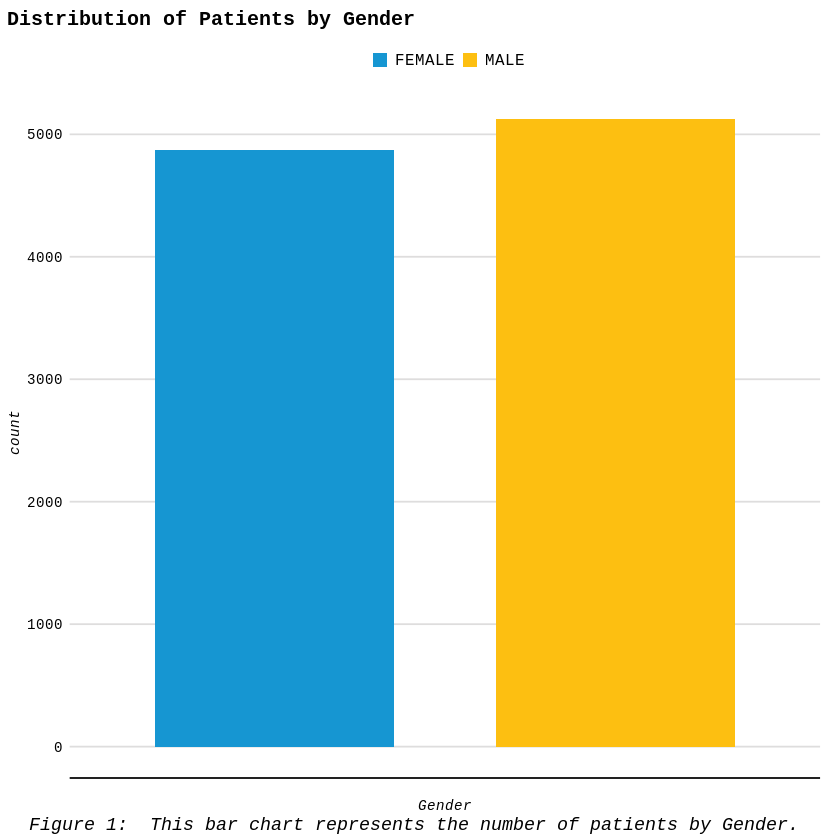

In [ ]:
#Gender
covid_mexico_data$sex <- toupper(covid_mexico_data$sex )
ggplot(data = na.omit(data.frame(Gender= covid_mexico_data$sex)), aes(x= Gender, fill= Gender ))+
  geom_bar()+
  ggplot2::scale_color_discrete(name= "T")+
  labs(title = "Distribution of Patients by Gender",
       caption = "Figure 1:  This bar chart represents the number of patients by Gender.")+
  theme(axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        plot.caption = element_text(size=11, hjust=0.5, face="italic", color="black"))


## Age

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,10000,42.61529,16.81914,41,41.98124,16.3086,0,107,107,0.308164,0.1564969,0.1681914


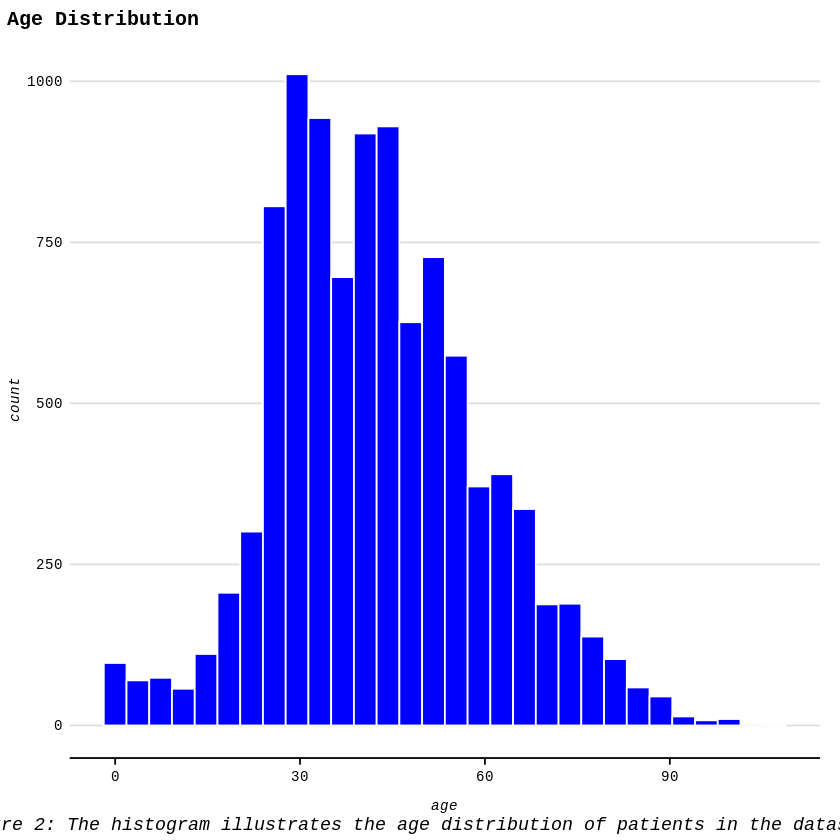

In [ ]:
#Age
ggplot(covid_mexico_data, aes(x=age)) +
  geom_histogram(color="white", fill="blue")+
  labs(title = "Age Distribution",
       caption = "Figure 2: The histogram illustrates the age distribution of patients in the dataset")+
  theme(plot.caption = element_text(size=11, hjust=0.5, face="italic", color="black"))

describe(covid_mexico_data$age)

## Symptoms Satge

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,10000,3.6413,3.244301,3,3.219125,2.9652,0,38,38,1.579877,5.330639,0.03244301


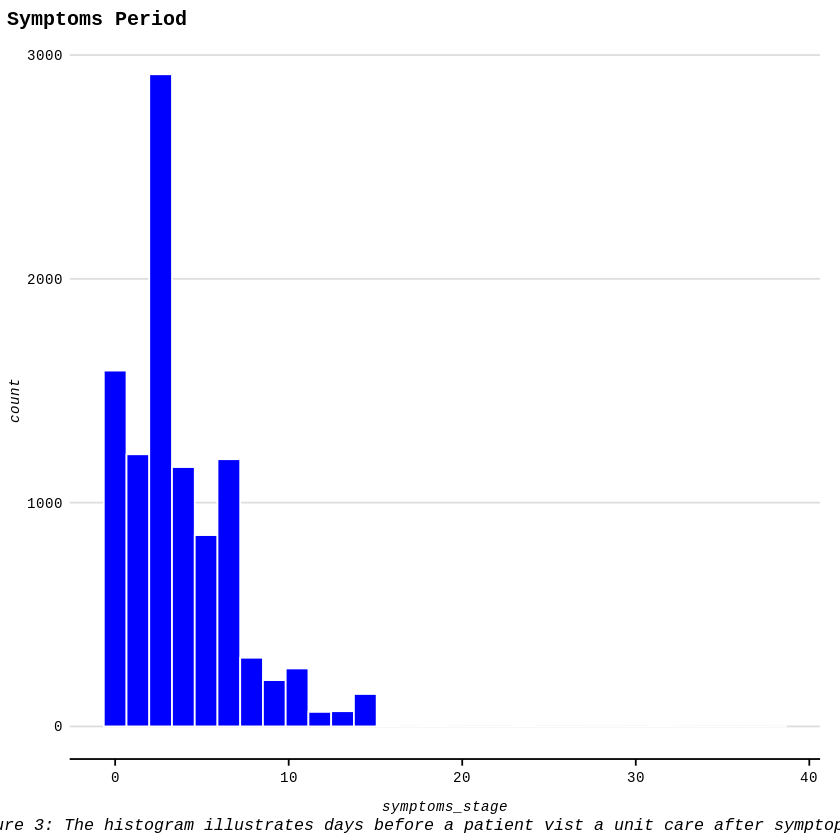

In [ ]:
# symptoms  period.
covid_mexico_data$symptoms_stage<- interval(covid_mexico_data$date_symptoms,covid_mexico_data$entry_date) / days(1)
#if negative days replace with mean
covid_mexico_data$symptoms_stage<- ifelse(covid_mexico_data$symptoms_stage<0 ,
                                               mean(covid_mexico_data$symptoms_stage, na.rm = T),
                                          covid_mexico_data$symptoms_stage)

ggplot(covid_mexico_data, aes(x=symptoms_stage)) +
  geom_histogram(color="white", fill="blue")+
  labs(title = "Symptoms Period",
       caption = "Figure 3: The histogram illustrates days before a patient vist a unit care after symptopsm")+
  theme(plot.caption = element_text(size=10, hjust=0.5, face="italic", color="black"))

describe(covid_mexico_data$symptoms_stage)

## Survival Period

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,463,12.05616,7.893301,11,11.14555,7.413,0,44,44,1.122127,1.409149,0.3668328


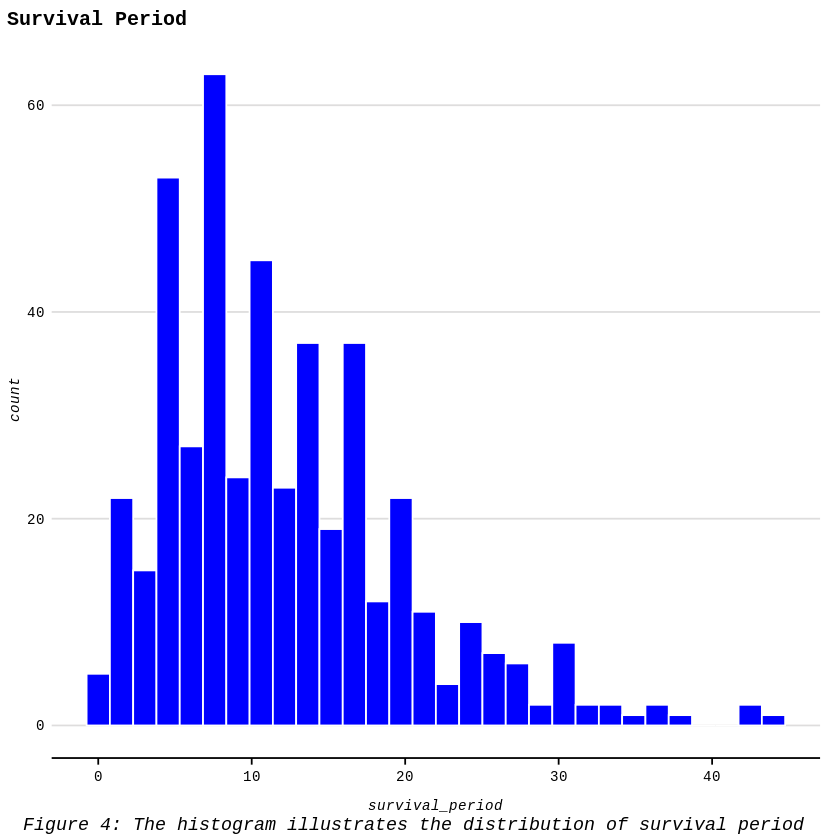

In [ ]:

# survival period
df_died<- covid_mexico_data %>%
  filter(!is.na(date_died), covid_res=="Positive")

df_died$survival_period<- interval(df_died$date_symptoms,df_died$date_died) / days(1)
#if negative days replace with mean
df_died$survival_period<- ifelse(df_died$survival_period<0 ,
                                          mean(df_died$survival_period, na.rm = T),
                                 df_died$survival_period)

ggplot(df_died, aes(x=survival_period)) +
  geom_histogram(color="white", fill="blue")+
  labs(title = "Survival Period",
       caption = "Figure 4: The histogram illustrates the distribution of survival period")+
  theme(plot.caption = element_text(size=11, hjust=0.5, face="italic", color="black"))
describe(df_died$survival_period)

## Covid results


AWAITING RESULTS         NEGATIVE         POSITIVE 
            1122             5013             3865 


AWAITING RESULTS         NEGATIVE         POSITIVE 
          0.1122           0.5013           0.3865 

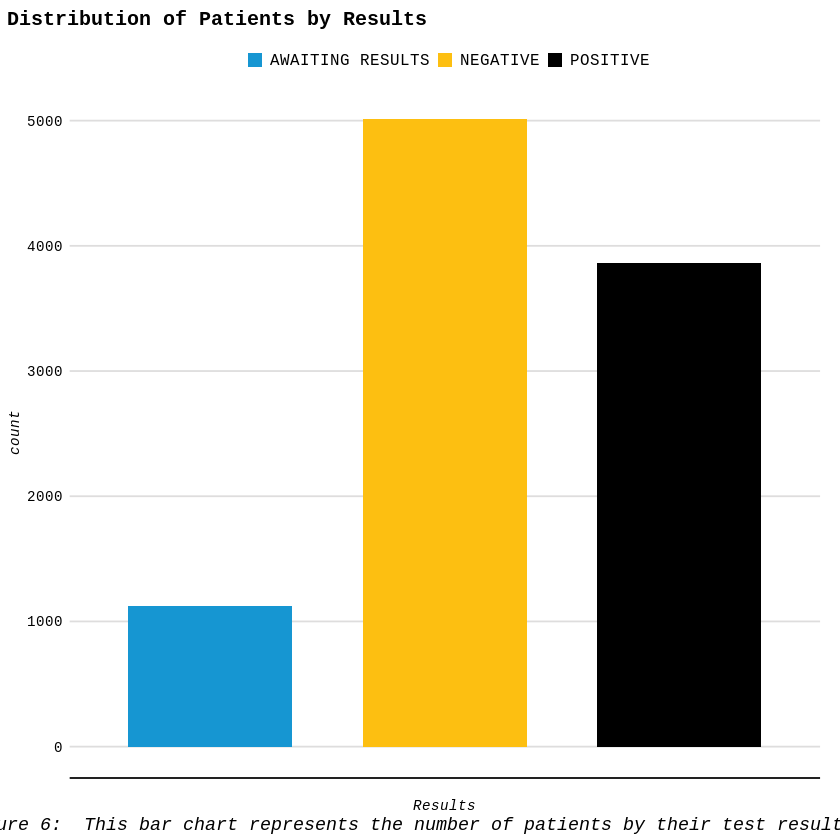

In [ ]:
# Target variable covid_res
covid_mexico_data$covid_res <- toupper(covid_mexico_data$covid_res )
ggplot(data = na.omit(data.frame(Results = covid_mexico_data$covid_res)), aes(x= Results, fill= Results ))+
  geom_bar()+
  ggplot2::scale_color_discrete(name= "T")+
  labs(title = "Distribution of Patients by Results",
       caption = "Figure 6:  This bar chart represents the number of patients by their test results.")+
  theme(axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        plot.caption = element_text(size=11, hjust=0.5, face="italic", color="black"))
table(covid_mexico_data$covid_res)
prop.table(table(covid_mexico_data$covid_res))

# Correlation Analysis

,age,symptoms_stage
age,1.00000000,0.07128814
symptoms_stage,0.07128814,1.00000000


`geom_smooth()` using formula = 'y ~ x'


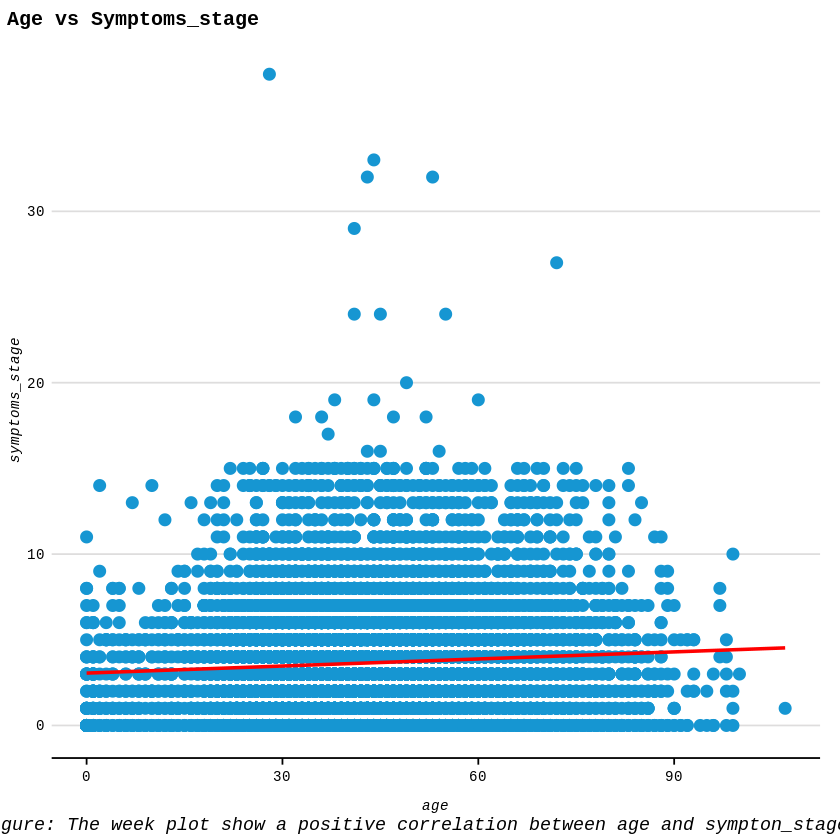

In [ ]:
#correlation
covid_mexico_data%>%
  select_if(is.numeric)%>%
  cor()

ggplot(data = covid_mexico_data, aes(x=age,symptoms_stage))+
  geom_point()+
  geom_smooth(se=FALSE, method = "lm", color="red")+
  labs(title = "Age vs Symptoms_stage",
       caption = "Figure: The week plot show a positive correlation between age and sympton_stage"
       )+
  theme(plot.caption = element_text(size=11, hjust=0.5, face="italic", color="black"))


# Comperative Analysis

## Anova Analysis

covid_res,avg_age
<chr>,<dbl>
AWAITING RESULTS,43.85493
NEGATIVE,40.04976
POSITIVE,45.58298


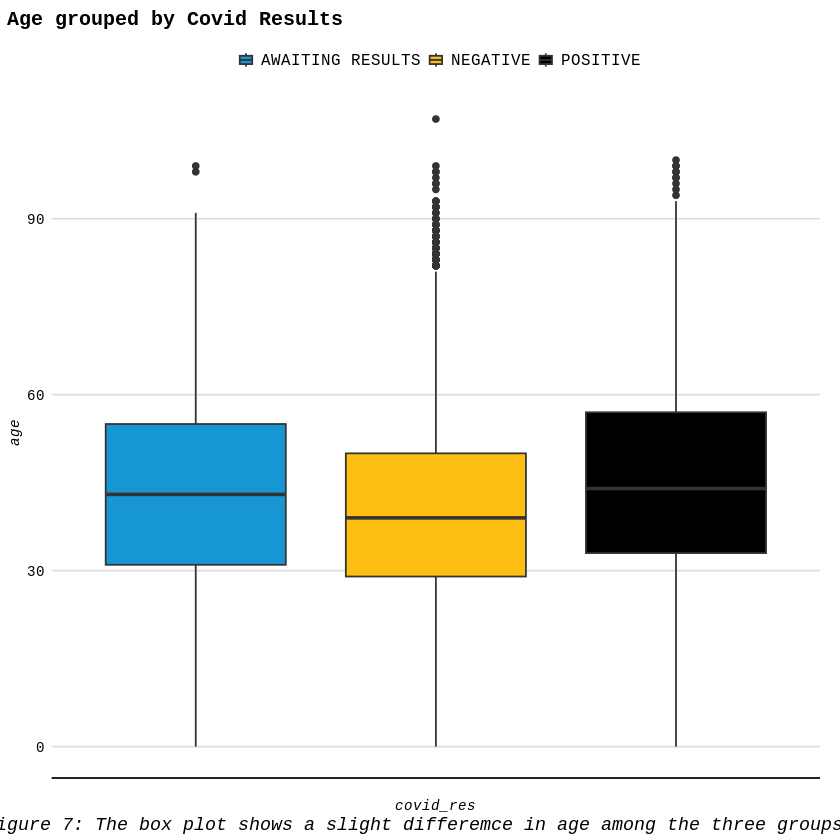

In [ ]:
covid_mexico_data%>%
  group_by(covid_res)%>%
  summarise(avg_age= mean(age, na.rm = ))


# Visualize
ggplot(covid_mexico_data, aes(x=covid_res, y=age, fill= covid_res)) +
  geom_boxplot()+
  labs(title = 'Age grouped by Covid Results',
       caption = "Figure 7: The box plot shows a slight differemce in age among the three groups")+
  theme(axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        plot.caption = element_text(size=11, hjust=0.5, face="italic", color="black"))



## Homogenity of Varaiance

In [ ]:
#perform Bartlett's test
bartlett.test(age ~ covid_res, data = covid_mexico_data)


	Bartlett test of homogeneity of variances

data:  age by covid_res
Bartlett's K-squared = 1.6336, df = 2, p-value = 0.4418


In [ ]:
# Run a annova to check difference in mean
# Compute the analysis of variance
res.aov <- aov(age ~ covid_res, data = covid_mexico_data)
# Summary of the analysis
summary(res.aov)
#model_parameters(res.aov)



              Df  Sum Sq Mean Sq F value Pr(>F)    
covid_res      2   68759   34380   124.5 <2e-16 ***
Residuals   9997 2759792     276                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Post-hoc ANOVA

In [ ]:
#As the p-value is less than the significance level 0.05, we can conclude that there are significant differences between the groups highlighted with “*" in the model summary.
TukeyHSD(res.aov)$covid_res%>%
  kable(format = "pipe", digits = 3, caption = "Tukey multiple comparisons of means")




Table: Tukey multiple comparisons of means

|                          |   diff|    lwr|    upr| p adj|
|:-------------------------|------:|------:|------:|-----:|
|NEGATIVE-AWAITING RESULTS | -3.805| -5.091| -2.519| 0.000|
|POSITIVE-AWAITING RESULTS |  1.728|  0.407|  3.049| 0.006|
|POSITIVE-NEGATIVE         |  5.533|  4.700|  6.367| 0.000|

## Symptoms stage vs covid results

covid_res,avg_age
<chr>,<dbl>
AWAITING RESULTS,3.983066
NEGATIVE,3.123878
POSITIVE,4.213195


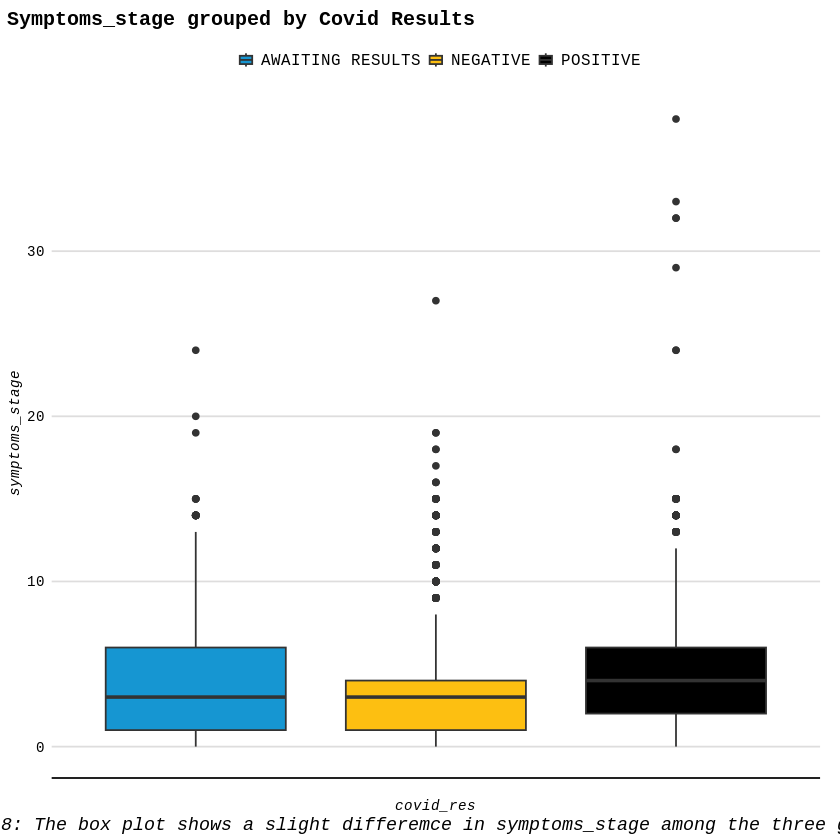

In [ ]:
covid_mexico_data%>%
  group_by(covid_res)%>%
  summarise(avg_age= mean(symptoms_stage, na.rm = ))

# Visualize
ggplot(covid_mexico_data, aes(x=covid_res, y=symptoms_stage, fill= covid_res)) +
  geom_boxplot()+
  labs(title = 'Symptoms_stage grouped by Covid Results',
       caption = "Figure 8: The box plot shows a slight differemce in symptoms_stage among the three groups")+
  theme(axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        plot.caption = element_text(size=11, hjust=0.5, face="italic", color="black"))


In [ ]:
#homogeniety of variance
bartlett.test(symptoms_stage~ covid_res, data = covid_mexico_data)


	Bartlett test of homogeneity of variances

data:  symptoms_stage by covid_res
Bartlett's K-squared = 96.567, df = 2, p-value < 2.2e-16


## Welch Anova

In [ ]:
# Run a anova to check difference in mean
# Compute the analysis of variance
res.aov2 <-  oneway.test(symptoms_stage~ covid_res, data = covid_mexico_data)
# Summary of the analysis
res.aov2
model_parameters(res.aov2)%>%
  #print_md()%>%
  kable(format = "pipe", digits = 3, caption = "Welch's ANOVA")

#method 2
#Welch Anova
# welch_anova_test(data = covid_mexico_data, formula = symptoms_stage~ covid_res)%>%
#   kable(format = "html", digits = 3, caption = "One-way analysis of means (not assuming equal variances)")%>%
#   kable_styling()



	One-way analysis of means (not assuming equal variances)

data:  symptoms_stage and covid_res
F = 132.93, num df = 2, denom df = 3036, p-value < 2.2e-16




Table: Welch's ANOVA

|       F| df| df_error|  p|Method                                                   |
|-------:|--:|--------:|--:|:--------------------------------------------------------|
| 132.932|  2| 3035.957|  0|One-way analysis of means (not assuming equal variances) |

In [ ]:
#As the p-value is less than the significance level 0.05, we can conclude that there are significant differences between the groups highlighted with “*" in the model summary.
covid_mexico_data%>%
  rstatix::pairwise_t_test(symptoms_stage~ covid_res, pool.sd = FALSE,
                           p.adjust.method = "bonferroni")%>%
  kable(format = "pipe", digits = 2, align='l',
        caption = "Post-Hoc Welch's Anova")



Table: Post-Hoc Welch's Anova

|.y.            |group1           |group2   |n1   |n2   |statistic |df      |p    |p.adj |p.adj.signif |
|:--------------|:----------------|:--------|:----|:----|:---------|:-------|:----|:-----|:------------|
|symptoms_stage |AWAITING RESULTS |NEGATIVE |1122 |5013 |7.83      |1528.73 |0.00 |0.00  |****         |
|symptoms_stage |AWAITING RESULTS |POSITIVE |1122 |3865 |-2.00     |1833.90 |0.05 |0.14  |ns           |
|symptoms_stage |NEGATIVE         |POSITIVE |5013 |3865 |-15.73    |7666.32 |0.00 |0.00  |****         |

## Grouped comparison
## Diabetic

In [ ]:
# Group_by categorical variables
#diabetic
prop.table(table(covid_mexico_data$covid_res, covid_mexico_data$diabetes),2)%>%
  rbind(c( 1,1))%>%
  kableExtra::kable( format = "pipe",
                     caption = "Covid results for patiens with diabitics")



Table: Covid results for patiens with diabitics

|                 |        No|       Yes|
|:----------------|---------:|---------:|
|AWAITING RESULTS | 0.1114923| 0.1163934|
|NEGATIVE         | 0.5188107| 0.3762295|
|POSITIVE         | 0.3696970| 0.5073770|
|                 | 1.0000000| 1.0000000|

## Pneumonia

In [ ]:
#pneumonia
prop.table(table(covid_mexico_data$covid_res, covid_mexico_data$pneumonia),2)%>%
  rbind(c( 1,1))%>%
  kableExtra::kable( format = "pipe",
                     caption = "Covid results of patiens with pnemonia")



Table: Covid results of patiens with pnemonia

|                 |        No|       Yes|
|:----------------|---------:|---------:|
|AWAITING RESULTS | 0.1159489| 0.0917906|
|NEGATIVE         | 0.5356129| 0.3135100|
|POSITIVE         | 0.3484382| 0.5946994|
|                 | 1.0000000| 1.0000000|

# Survival analysis

## Preparing the data

In [ ]:

#recheck missing values
# Check missing values
lapply(covid_mexico_data, function(x) sum(is.na(x))) %>% str()



List of 24
 $ id                 : int 0
 $ sex                : int 0
 $ patient_type       : int 0
 $ entry_date         : int 0
 $ date_symptoms      : int 0
 $ date_died          : int 9361
 $ intubed            : int 7863
 $ pneumonia          : int 1
 $ age                : int 0
 $ pregnancy          : int 5159
 $ diabetes           : int 35
 $ copd               : int 31
 $ asthma             : int 32
 $ inmsupr            : int 34
 $ hypertension       : int 32
 $ other_disease      : int 44
 $ cardiovascular     : int 34
 $ obesity            : int 31
 $ renal_chronic      : int 33
 $ tobacco            : int 34
 $ contact_other_covid: int 3107
 $ covid_res          : int 0
 $ icu                : int 7863
 $ symptoms_stage     : int 0


In [ ]:
df_sur<-covid_mexico_data%>%
  mutate(intubed= ifelse(is.na(intubed),"No", intubed ),
         pregnancy=NULL,
         contact_other_covid=NULL,
         icu=NULL,
         status= ifelse(is.na(date_died), 0, 1 ),
         survival_period=interval(date_symptoms,date_died) / days(1),
         survival_period= ifelse(is.na(survival_period),
                                 interval(date_symptoms,ymd("2020-06-30")) / days(1),
                                 survival_period)
         )%>%
  select(-c(date_died, id, entry_date, date_symptoms))

# convert character variables to factor data types
df_sur<- df_sur%>%
  mutate_if(is.character, as.factor)

#Pre-exisiting Conditions
# Fitting the Cox model
Cox_mod_conditions <- coxph(Surv(df_sur$survival_period,
                      df_sur$status)~.,
                 data = df_sur)

# Summary of the model
summary(Cox_mod_conditions)

Call:
coxph(formula = Surv(df_sur$survival_period, df_sur$status) ~ 
    ., data = df_sur)

  n= 9934, number of events= 633 
   (66 observations deleted due to missingness)

                            coef exp(coef)  se(coef)       z Pr(>|z|)    
sexMALE                 0.235242  1.265215  0.085564   2.749  0.00597 ** 
patient_typeOutpatient -2.467660  0.084783  0.157222 -15.695  < 2e-16 ***
intubedYes              0.740463  2.096905  0.111761   6.625 3.46e-11 ***
pneumoniaYes            0.662693  1.940010  0.104813   6.323 2.57e-10 ***
age                     0.030788  1.031267  0.002767  11.127  < 2e-16 ***
diabetesYes             0.116075  1.123080  0.089764   1.293  0.19598    
copdYes                -0.132977  0.875485  0.193226  -0.688  0.49133    
asthmaYes               0.340468  1.405606  0.235075   1.448  0.14752    
inmsuprYes              0.141544  1.152051  0.237143   0.597  0.55059    
hypertensionYes         0.116202  1.123223  0.091741   1.267  0.20529    
other_disea

## Significant variables

In [ ]:
kk<-summary(Cox_mod_conditions)$coefficients%>%
  as.data.frame()%>%
  filter(`Pr(>|z|)`< 0.05)

round(kk, 4)%>%
  kableExtra::kable( format = "pipe",
                     caption = "Significant Predictors in Survival Model")



Table: Significant Predictors in Survival Model

|                       |    coef| exp(coef)| se(coef)|        z| Pr(>&#124;z&#124;)|
|:----------------------|-------:|---------:|--------:|--------:|------------------:|
|sexMALE                |  0.2352|    1.2652|   0.0856|   2.7493|             0.0060|
|patient_typeOutpatient | -2.4677|    0.0848|   0.1572| -15.6954|             0.0000|
|intubedYes             |  0.7405|    2.0969|   0.1118|   6.6254|             0.0000|
|pneumoniaYes           |  0.6627|    1.9400|   0.1048|   6.3227|             0.0000|
|age                    |  0.0308|    1.0313|   0.0028|  11.1274|             0.0000|
|other_diseaseYes       |  0.3115|    1.3654|   0.1523|   2.0452|             0.0408|
|renal_chronicYes       |  0.3309|    1.3922|   0.1518|   2.1804|             0.0292|
|covid_resNEGATIVE      | -0.4287|    0.6514|   0.1819|  -2.3567|             0.0184|
|covid_resPOSITIVE      |  0.4706|    1.6010|   0.1608|   2.9274|             0.0034|
|sy

## Survival curve

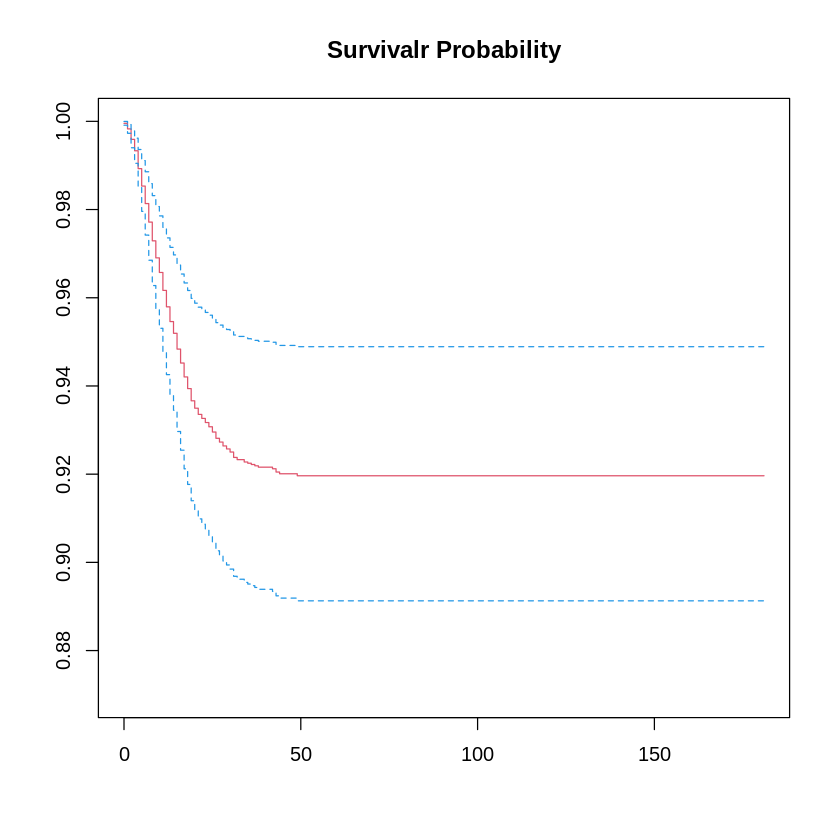

In [ ]:
# Fitting survfit()
Cox <- survfit(Cox_mod_conditions)
# Plotting the function
plot(Cox, ylim = c(1,0.87), main="Survivalr Probability",
     col = c(2,4,4))

# classification model

In [ ]:
library(tensorflow)
library(keras)
library(tidyverse)
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ psych::%+%()                         masks ggplot2::%+%()
✖ recipes::all_double()                masks gtsummary::all_double()
✖ recipes::all_factor()                masks gtsummary::all_factor()
✖ recipes::all_integer()               masks gtsummary::all_integer()
✖ recipes::all_logical()               masks gtsummary::all_logical()
✖ recipes::all_numeric()               masks gtsummary::all_numeric()
✖ scales::alpha()                      masks psych::alpha(), ggplot2::alpha()
✖ infer::chisq_test()                  masks rstatix::chisq_test()
✖ scales::discard()        

## Data Prep for the model

In [ ]:
model_data<- df_sur%>%
  mutate(covid_res= case_when(covid_res=="NEGATIVE"~0,
                              covid_res=="POSITIVE"~1))%>%
  dplyr::select(-c(status,survival_period))%>%
  drop_na()

df<-model_data%>%
  mutate_if(is.factor, as.numeric)

## Split test and  train

In [ ]:
#Prepare a validation set
val_idxs <- nrow(df) %>% sample.int(., ceiling( . * 0.2))
val_df <- df[val_idxs, ]
train_df <- df[-val_idxs, ]

sprintf("Number of training samples: %s", nrow(train_df))
sprintf("Number of validation samples: %s", nrow(val_df))

[1] "Number of training samples: 7055"

[1] "Number of validation samples: 1764"

## Check if our data is balnce

In [ ]:
#Analyze imbalace target
table(train_df$covid_res)
#weights
weight_for_0 <- 1 / sum(train_df$covid_res == 0)
weight_for_1 <- 1 / sum(train_df$covid_res == 1)


   0    1 
3993 3062 

## Nomarlize the data

In [ ]:
#Normalize the data using train set
feature_names <- colnames(train_df) %>% setdiff("covid_res")
means <- lapply(train_df[feature_names], mean)
stds <- lapply(train_df[feature_names], sd)

for (name in feature_names) {
  train_df[[name]] %<>% { (. - means[[name]]) / stds[[name]] }
  val_df[[name]] %<>% { (. - means[[name]]) / stds[[name]] }
}

## Classification model

In [ ]:
#Binary classification model
model <- keras_model_sequential(input_shape = c(length(feature_names))) %>%
  layer_dense(256, activation = "relu") %>%
  layer_dense(256, activation = "relu") %>%
  layer_dropout(0.3) %>%
  layer_dense(256, activation = "relu") %>%
  layer_dropout(0.3) %>%
  layer_dense(1, activation = "sigmoid")

model

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3 (Dense)                    (None, 256)                     4352        
 dense_2 (Dense)                    (None, 256)                     65792       
 dropout_1 (Dropout)                (None, 256)                     0           
 dense_1 (Dense)                    (None, 256)                     65792       
 dropout (Dropout)                  (None, 256)                     0           
 dense (Dense)                      (None, 1)                       257         
Total params: 136193 (532.00 KB)
Trainable params: 136193 (532.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________

## Train the model with class weight arguments

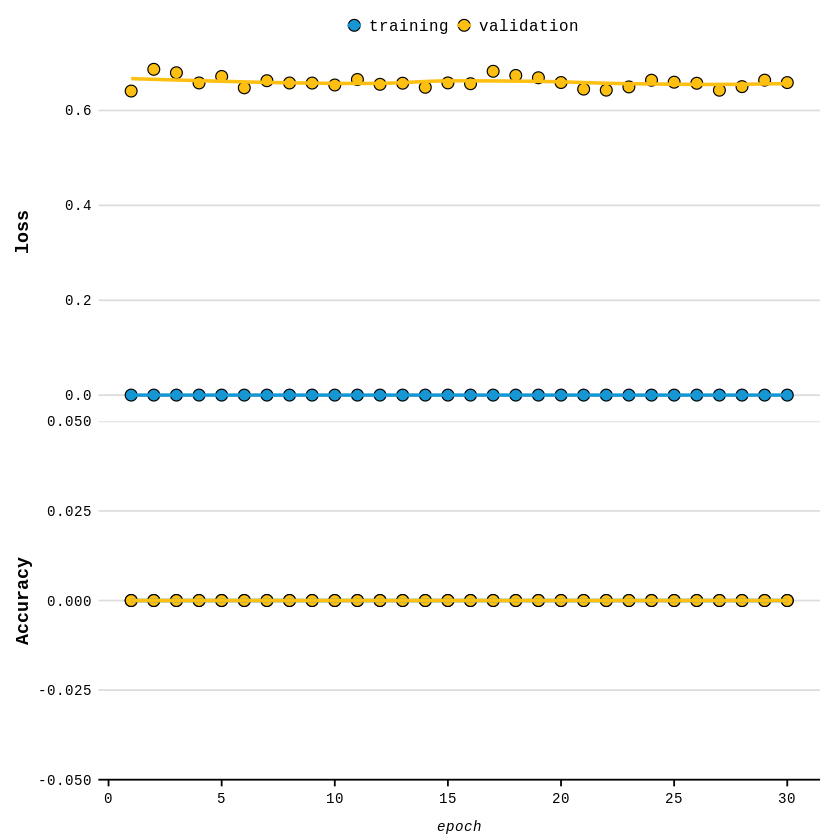

In [ ]:
#Train the model with class weight arguments
metrics <- list(
  # metric_false_negatives(name = "fn"),
  # metric_false_positives(name = "fp"),
  # metric_true_negatives(name = "tn"),
  # metric_true_positives(name = "tp"),
  # metric_precision(name = "precision"),
  # metric_recall(name = "recall"),
  metric_accuracy(name = "Accuracy")
)

model %>% compile(
  optimizer = optimizer_adam(1e-2),
  loss = "binary_crossentropy",
  metrics = metrics
)
class_weight <- list("0" = weight_for_0,
                     "1" = weight_for_1)
callbacks <- list(
  callback_model_checkpoint("positive_model_at_epoch_{epoch}.h5"))

train_features <- as.matrix(train_df[feature_names])
train_targets <- as.matrix(train_df$covid_res)
validation_data <- list(
  as.matrix(val_df[feature_names]),
  as.matrix(val_df$covid_res))

history <- model %>%
  fit(train_features, train_targets,
      validation_data = validation_data,
      class_weight = class_weight,
      validation_split = 0.2, epochs = 30,
      callbacks = callbacks,
      verbose = 1)

plot(history)


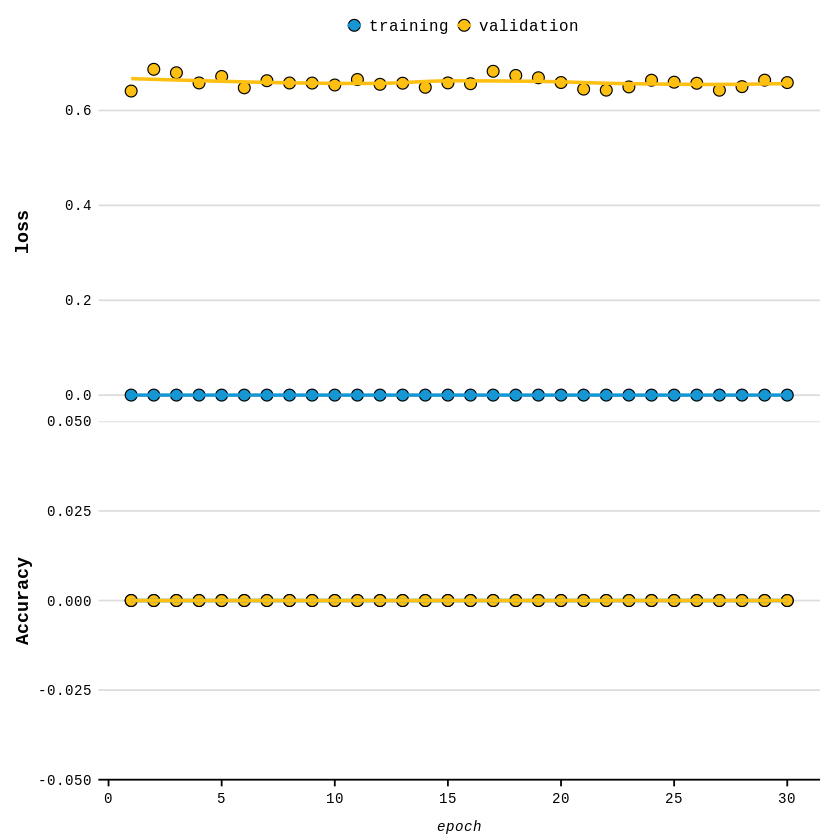

In [ ]:
plot(history)

## Predicted data

In [ ]:
# predicting
val_pred <- model %>%
  predict(as.matrix(val_df[feature_names])) %>%
  { ifelse(. > .5, 1, 0) }

pred_correct <- val_df$covid_res == val_pred
cat(sprintf("Validation accuracy: %.2f", mean(pred_correct)))

Validation accuracy: 0.63

## Confusion matrix

In [ ]:
library(caret)
confusionMatrix(factor(val_pred), factor(val_df$covid_res))



Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:tensorflow’:

    train


The following object is masked from ‘package:survival’:

    cluster


The following object is masked from ‘package:parameters’:

    compare_models


The following object is masked from ‘package:purrr’:

    lift




Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 727 392
         1 264 381
                                          
               Accuracy : 0.6281          
                 95% CI : (0.6051, 0.6507)
    No Information Rate : 0.5618          
    P-Value [Acc > NIR] : 9.056e-09       
                                          
                  Kappa : 0.2307          
                                          
 Mcnemar's Test P-Value : 7.103e-07       
                                          
            Sensitivity : 0.7336          
            Specificity : 0.4929          
         Pos Pred Value : 0.6497          
         Neg Pred Value : 0.5907          
             Prevalence : 0.5618          
         Detection Rate : 0.4121          
   Detection Prevalence : 0.6344          
      Balanced Accuracy : 0.6132          
                                          
       'Positive' Class : 0               
                              

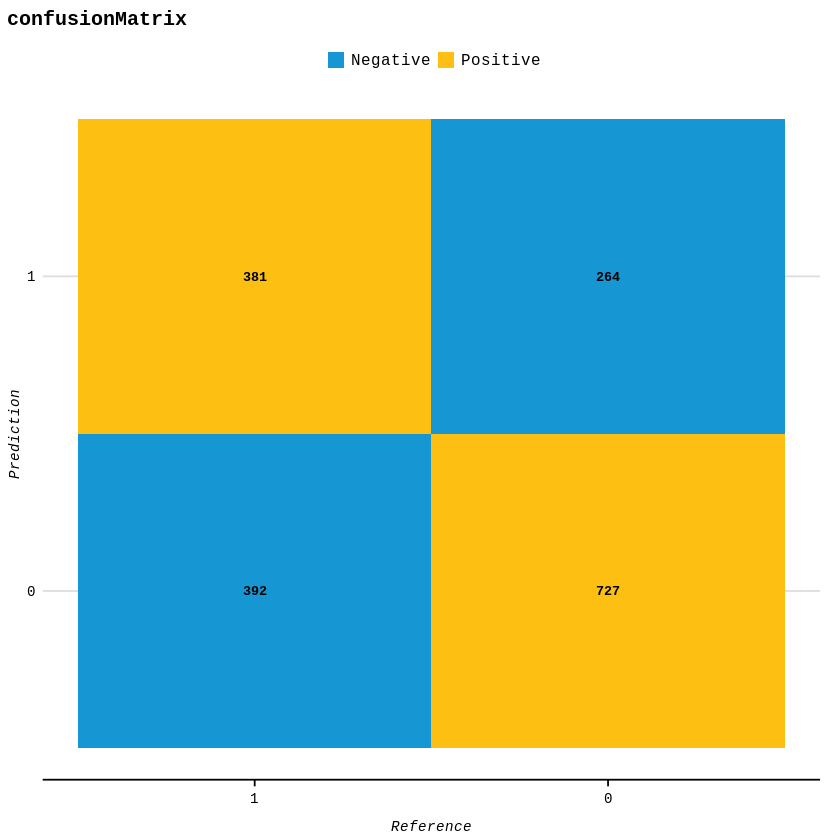

In [ ]:
table <- data.frame(confusionMatrix(factor(val_pred), factor(val_df$covid_res))$table)

plotTable <- table %>%
  mutate(covid_res= ifelse(table$Prediction == table$Reference, "Positive", "Negative")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))

# fill alpha relative to sensitivity/specificity by proportional outcomes within reference groups (see dplyr code above as well as original confusion matrix for comparison)
ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = covid_res)) +
  geom_tile() +
 geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 1) +
  labs(title = "confusionMatrix")+
  xlim(rev(levels(table$Reference)))